In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
measures=["Age","Fare"]
dimensions=["Pclass","Sex","SibSp","Parch","Embarked"]

Finding the missing values

<Axes: >

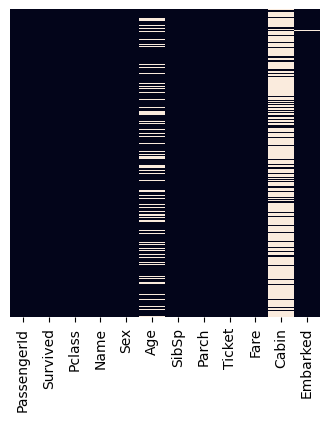

In [7]:
plt.figure(figsize=(4,4))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

In [19]:
n=train.isnull()
n.sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Hence, the column Age, Cabin and Embarked has missing values. The missing values in the column Age can be substituted with the average age value but there are too many missing values in the column "Cabin" so it will be wise to just drop this column instead.

In [9]:
train.drop("Cabin",axis=1,inplace=True)

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Filling in the missing values in the Age column

<Axes: xlabel='Pclass', ylabel='Age'>

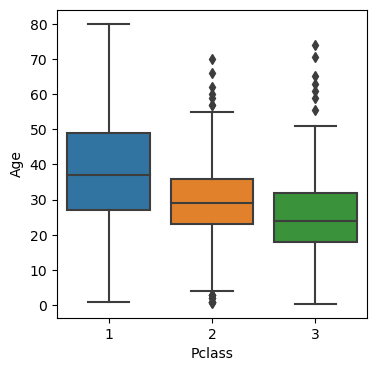

In [12]:
plt.figure(figsize=(4,4))
sns.boxplot(data=train,x="Pclass",y="Age")

In [14]:
def impute_values(cols):
    Age=cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
train["Age"]=train[["Age","Pclass"]].apply(impute_values,axis=1)

<Axes: xlabel='Pclass', ylabel='Age'>

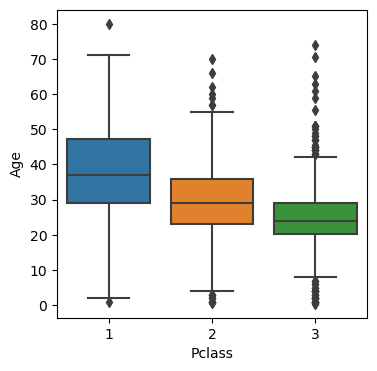

In [15]:
plt.figure(figsize=(4,4))
sns.boxplot(data=train,x="Pclass",y="Age")

In [17]:
# Filling in the missing value in the Embarked Column
train['Embarked'].fillna(value="S",inplace=True)

<Axes: >

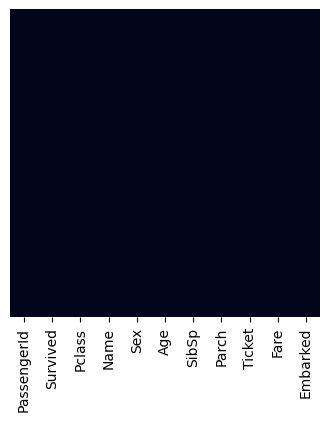

In [18]:
plt.figure(figsize=(4,4))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

# Exploratory Data Analysis

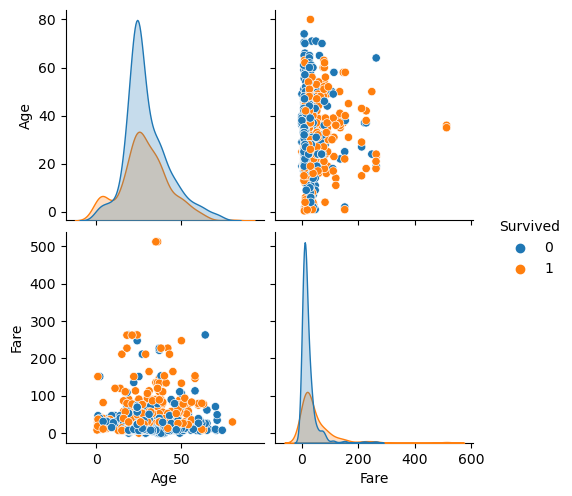

In [21]:
sns.pairplot(train,x_vars=measures,y_vars=measures,hue="Survived")

In [29]:
train[measures].corrwith(train["Survived"])

Age    -0.047255
Fare    0.257307
dtype: float64

As seen by the correlation values, Age almost has no correlation with the target variable as opposed to the Fare variable. As also seen in the graphs, Those that had given Fare between 0 to 100 were more likely to die as compared to the ones that had paid a higher fair.

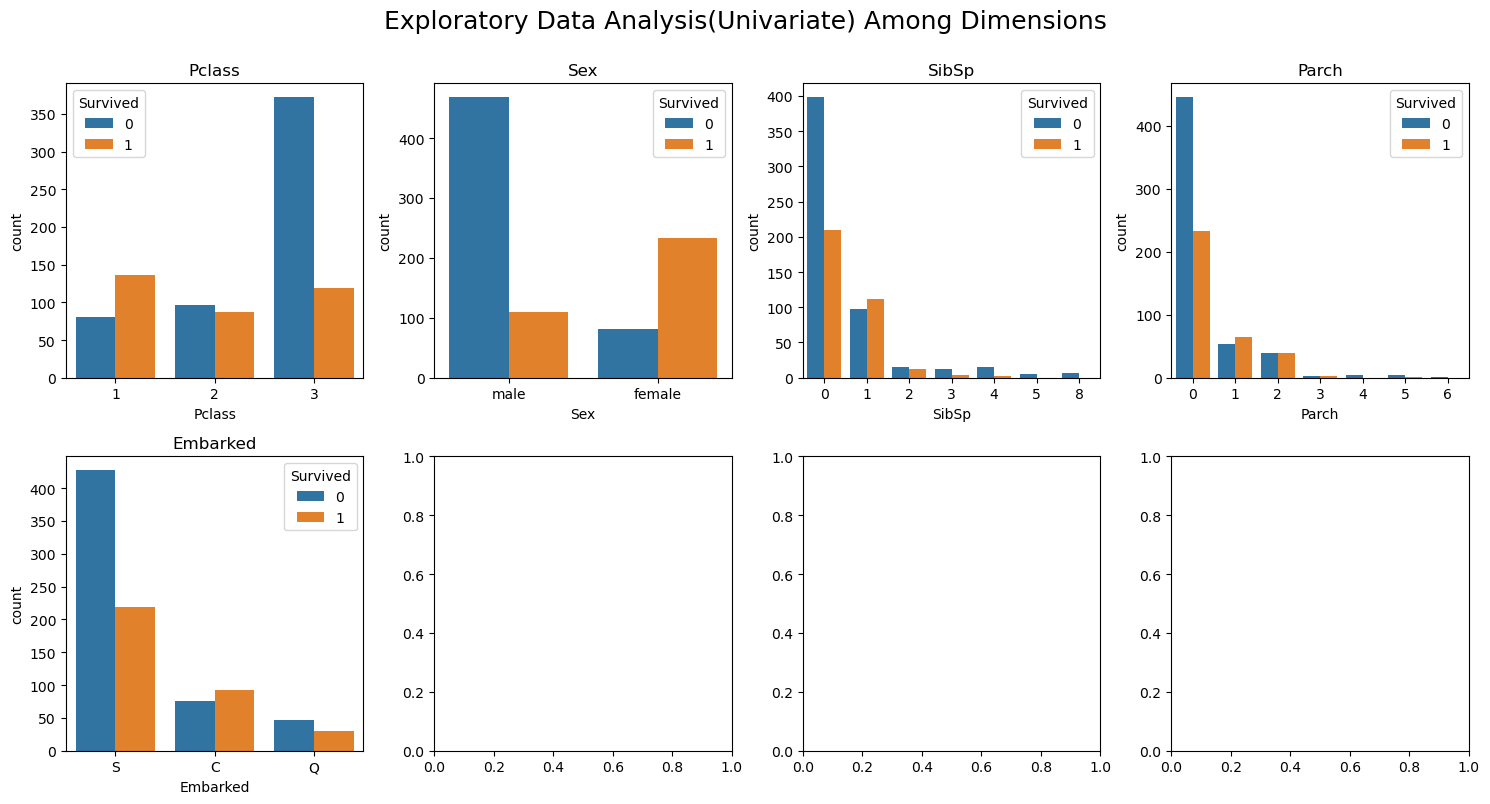

In [34]:
figure, ax= plt.subplots(2,4, figsize=(15,8))
figure.suptitle("Exploratory Data Analysis(Univariate) Among Dimensions",x=0.5,y=1,size=18)
for i in range(4):
    ax[0][i].set_title(dimensions[i])
    sns.countplot(train,x=dimensions[i],hue="Survived",ax=ax[0][i])
ax[1][0].set_title(dimensions[4])
sns.countplot(train,x=dimensions[4],hue="Survived",ax=ax[1][0])
plt.tight_layout()

Insights:-
1. Those who were in the Pclass 1 and 2 were more likely to survive as seen the graph above(from left, the first one)- the ones who survived is higher as compared to those that didn't in Pclass 1 and in case of Pclass 2 the ratio is almost the same, as opposed to the ones who were in the Pclass 3 where only a fourth of those survived, hence the feature Pclass is definetly associated with the target variable.
2. As seen in the second graph, even though the number of males were significanty higher as compared to the women, the number of females that survived  was almost double as compared to the men. And the number of male that died is almost the four times as compared to the number of women that died, hence there is a clear association between the gender and survival.
3. The other two graphs don't give us that much information. There is no clear association between these variable and the target variable.

In [35]:
from scipy.stats.contingency import association
d={}
for feature in dimensions:
    confusion_matrix = pd.crosstab(train[feature], train["Survived"])
    d[feature]=association(confusion_matrix, method="cramer")
pd.Series(d)

Pclass      0.339817
Sex         0.543351
SibSp       0.204527
Parch       0.177037
Embarked    0.170707
dtype: float64

As seen by the association values, Pclass and Sex both have very high association with the target variable "Survived" as compared to the SibSp and Parch.

### Data Processing


The next step in the project is to prepare the data for the modelling. The following preprocessing techniques are being used here:-
1. Convert the categorical features into dummies or doing categorical encoding.
2. Binning the numerical features.
3. Dropping the unnecessary columns like PassengerId.

In [43]:
X=train.drop(["Age","PassengerId","Name","Ticket","Survived","Sex","Embarked"],axis=1)
y=train["Survived"]
x=pd.get_dummies(train[["Sex","Embarked"]],drop_first=True)
X=pd.concat([X,x],axis=1)
bins=list(np.linspace(start=X["Fare"].min(),stop=X["Fare"].max(),num=5))
X["Fare"] = pd.cut(X["Fare"], bins)
X["Fare"]= X["Fare"].cat.codes
X.head()

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,0,1,0,1
1,1,1,0,0,0,0,0
2,3,0,0,0,0,0,1
3,1,1,0,0,0,0,1
4,3,0,0,0,1,0,1


In [45]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
def performance_met(model,X_train,Y_train,X_test,Y_test):

    acc_train=metrics.accuracy_score(Y_train, model.predict(X_train))

    f1_train=metrics.f1_score(Y_train, model.predict(X_train))

    acc_test=metrics.accuracy_score(Y_test, model.predict(X_test))

    f1_test=metrics.f1_score(Y_test, model.predict(X_test))

    print("train score: accuracy:{} f1:{}".format(acc_train,f1_train))

    print("test score: accuracy:{} f1:{}".format(acc_test,f1_test))

## Logistic Regression

In [52]:
model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train) 
performance_met(model,X_train,y_train,X_test,y_test)

train score: accuracy:0.7969798657718121 f1:0.7166276346604215
test score: accuracy:0.7864406779661017 f1:0.7341772151898733


## Decision Tree

In [51]:
model_DT=DecisionTreeClassifier(random_state=1) 
model_DT.fit(X_train,y_train)
performance_met(model_DT,X_train,y_train,X_test,y_test)

train score: accuracy:0.8557046979865772 f1:0.7794871794871795
test score: accuracy:0.7593220338983051 f1:0.6666666666666667


# Random Forest Classifier

In [50]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
performance_met(model,X_train,y_train,X_test,y_test)

train score: accuracy:0.8557046979865772 f1:0.7817258883248731
test score: accuracy:0.7627118644067796 f1:0.6818181818181818
